# U.S. Medical Insurance Costs

_Analysis by A Hayes_

## Project Scope


The aim of this project is to conduct an in-depth analysis of an insurance dataset to uncover insights into the factors that affect insurance costs. This dataset contains information on insurance beneficiaries, including their age, sex, BMI (Body Mass Index), number of children, smoking status, region, and insurance charges. Through this analysis, we aim to explore how these factors influence insurance charges and identify patterns and trends that can provide valuable insights for insurance companies, policyholders, and researchers interested in healthcare economics.

## Goals

The specific objectives of this project are to:

* Understand basic statistics of the dataset, including distributions of ages, BMI, and charges.
* Investigate the correlation between different factors and insurance charges.
* Examine the impact of categorical variables (such as sex, smoker status, and region) on insurance charges.
* Explore more complex relationships, such as interaction effects between smoking status and BMI on insurance charges, and geographical patterns in the data.
* Predict insurance charges based on beneficiary characteristics using simple predictive models (as an advanced goal).

## Data


The dataset, **insurance.csv**, includes the following columns:

* age: Age of the primary beneficiary
* sex: Insurance contractor gender, female or male
* bmi: Body mass index
* children: Number of children covered by health insurance / Number of dependents
* smoker: Smoking status
* region: The beneficiary's residential area in the US, divided into four geographic regions - northeast, southeast, southwest, or northwest
* charges: Individual medical costs billed by health insurance

## Analysis Roadmap

1. **Data Exploration and Cleaning:** Load the dataset, check for missing values and data types, and perform any necessary preprocessing.

2. **Descriptive Analysis:** Provide summary statistics for the dataset and visualize distributions.

3. **Correlation and Comparative Analysis:** Explore how different factors correlate with insurance charges and compare charges across different groups.

4. **Advanced Analysis:** Delve into more sophisticated analyses, including interaction effects and geographical patterns.

5. **Predictive Modeling:** As an extension, develop a simple model to predict insurance charges based on the variables provided.

### 1. Data Exploration / Cleaning

#### Load Data

In [1]:
import pandas as pd

# Load the dataset
file_path = 'insurance.csv'  
insurance_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
insurance_data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Check For Missing Values

In [2]:
# Checking for missing values in each column
missing_values = insurance_data.isnull().sum()
print(missing_values)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


#### Examine Data Types

In [3]:
# Checking the data types of each column
data_types = insurance_data.dtypes
print(data_types)


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


#### Initial Observations

The clean state of the dataset and the variety of variables present opportunities for robust analysis. It will be particularly interesting to investigate how factors like age, BMI, smoking status, and the number of children impact insurance charges. Initial guesses would suggest that age and smoking status might have a significant influence on insurance charges, but the data will reveal the nature of these relationships.

### 2. Descriptive Analysis

#### Summarize Numerical Stats

In [4]:
# Generate statistics for numerical variables
numerical_stats = insurance_data.describe()
numerical_stats


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Explore Categorical Variables

In [5]:
# Count the frequency of categories in categorical variables
sex_counts = insurance_data['sex'].value_counts()
smoker_counts = insurance_data['smoker'].value_counts()
region_counts = insurance_data['region'].value_counts()

sex_counts, smoker_counts, region_counts

(sex
 male      676
 female    662
 Name: count, dtype: int64,
 smoker
 no     1064
 yes     274
 Name: count, dtype: int64,
 region
 southeast    364
 southwest    325
 northwest    325
 northeast    324
 Name: count, dtype: int64)

#### Visualizing the Data

Let's make a basic histogram to understand the distribution of 'age', 'bmi' and 'charges'

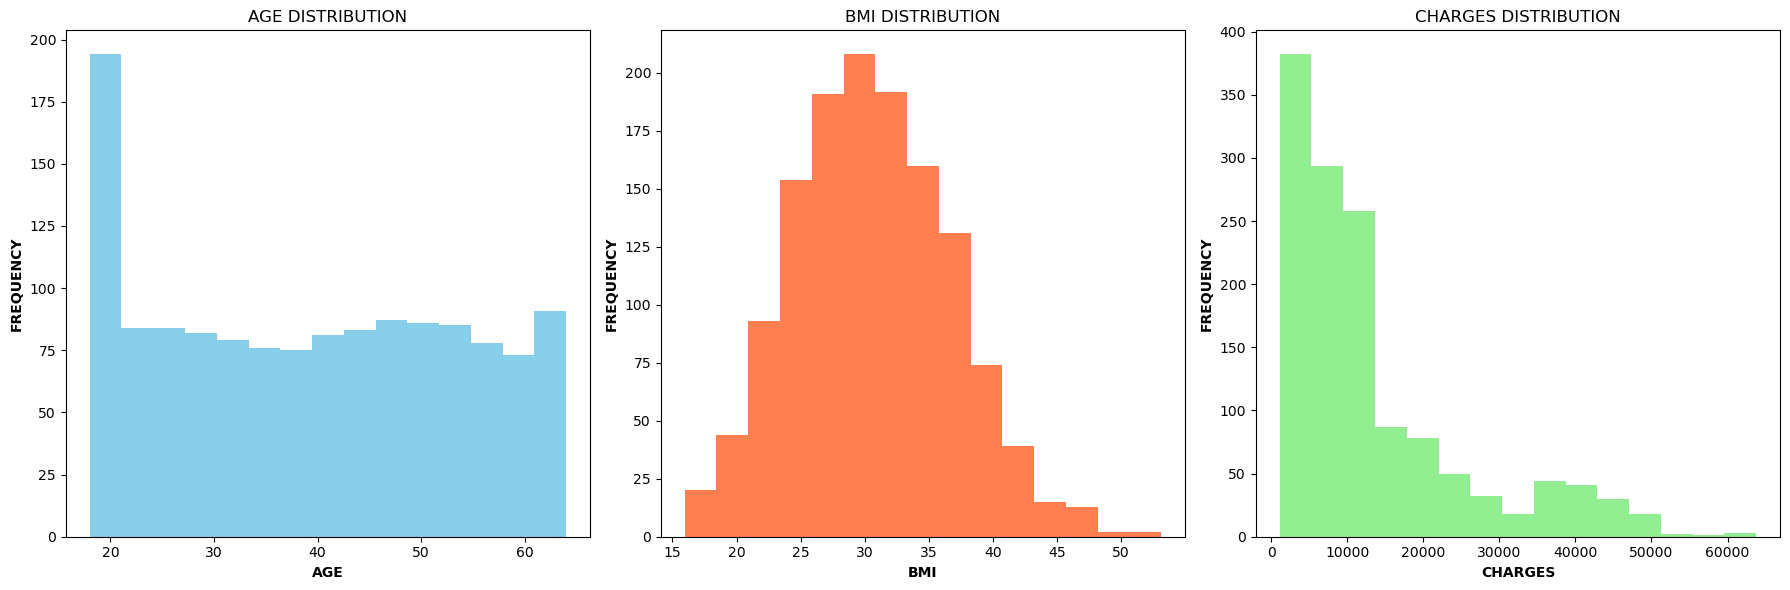

In [8]:
import matplotlib.pyplot as plt

# Plotting histograms for numerical variables 'age', 'bmi', and 'charges' with readability enhancements
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Age Distribution
insurance_data['age'].plot(kind='hist', ax=ax[0], bins=15, color='skyblue', title='AGE DISTRIBUTION')
ax[0].set_xlabel('AGE', fontweight='bold')
ax[0].set_ylabel('FREQUENCY', fontweight='bold')

# BMI Distribution
insurance_data['bmi'].plot(kind='hist', ax=ax[1], bins=15, color='coral', title='BMI DISTRIBUTION')
ax[1].set_xlabel('BMI', fontweight='bold')
ax[1].set_ylabel('FREQUENCY', fontweight='bold')

# Charges Distribution
insurance_data['charges'].plot(kind='hist', ax=ax[2], bins=15, color='lightgreen', title='CHARGES DISTRIBUTION')
ax[2].set_xlabel('CHARGES', fontweight='bold')
ax[2].set_ylabel('FREQUENCY', fontweight='bold')

plt.tight_layout()
plt.show()


Let's make a bar chart to see the frequency of each category in 'sex', 'smoker' and 'region'

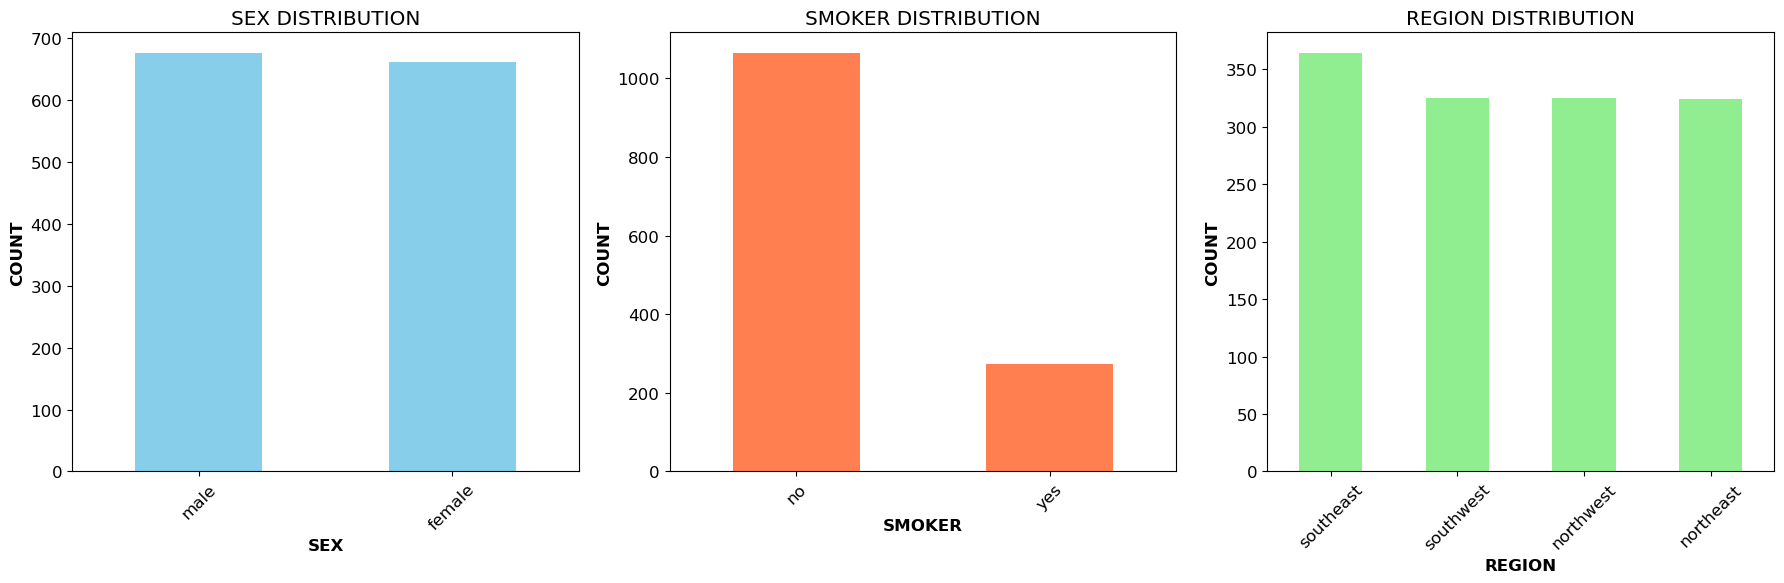

In [9]:
# Visualizing the distribution of categorical variables

# Set larger font size for plots
plt.rcParams.update({'font.size': 12})

# Plotting histograms for numerical variables with increased readability
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Sex Distribution
insurance_data['sex'].value_counts().plot(kind='bar', ax=ax[0], color='skyblue', title='SEX DISTRIBUTION')
ax[0].set_xlabel('SEX', fontweight='bold')
ax[0].set_ylabel('COUNT', fontweight='bold')
ax[0].tick_params(axis='x', rotation=45)

# Smoker Distribution
insurance_data['smoker'].value_counts().plot(kind='bar', ax=ax[1], color='coral', title='SMOKER DISTRIBUTION')
ax[1].set_xlabel('SMOKER', fontweight='bold')
ax[1].set_ylabel('COUNT', fontweight='bold')
ax[1].tick_params(axis='x', rotation=45)

# Region Distribution
insurance_data['region'].value_counts().plot(kind='bar', ax=ax[2], color='lightgreen', title='REGION DISTRIBUTION')
ax[2].set_xlabel('REGION', fontweight='bold')
ax[2].set_ylabel('COUNT', fontweight='bold')
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


### 3. Correlation Analysis

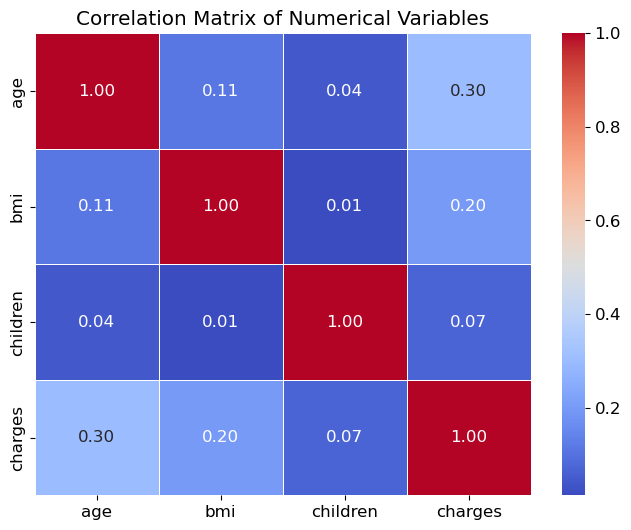

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for the correlation matrix calculation
numerical_insurance_data = insurance_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix now with only numerical data
correlation_matrix = numerical_insurance_data.corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()




Key observations from the matrix:

* There appears to be a positive correlation between age and charges, indicating that insurance charges tend to increase as age increases.
* The correlation between bmi and charges is also positive, suggesting that higher BMI is associated with higher insurance charges, although the correlation is not as strong as with age.
* The children variable shows a weaker positive correlation with charges, implying that having more children may lead to slightly higher insurance charges.
* The correlations between age, bmi, and children with each other are relatively low, indicating that these variables do not strongly influence one another.

### 4. Comparative Analysis

#### Comparison of Charges Between Smokers/Non-Smokers & Average Insurance Charges by Region

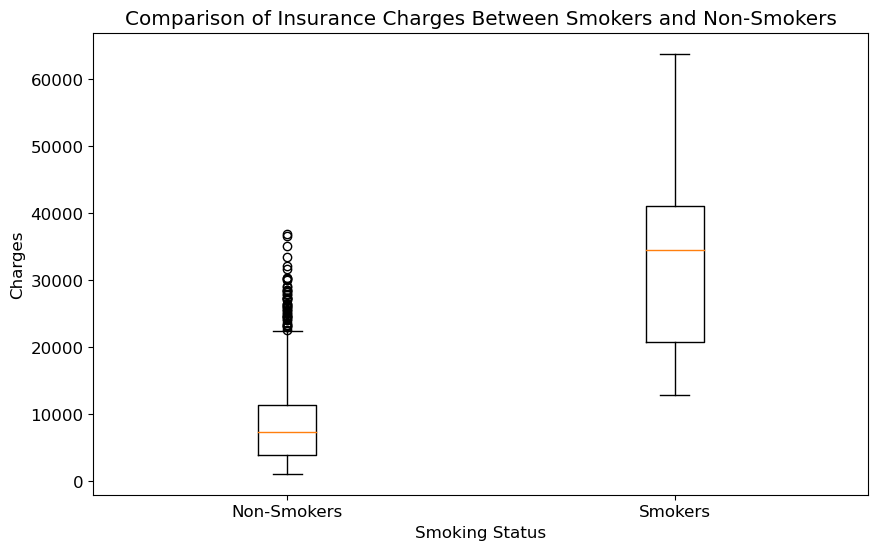

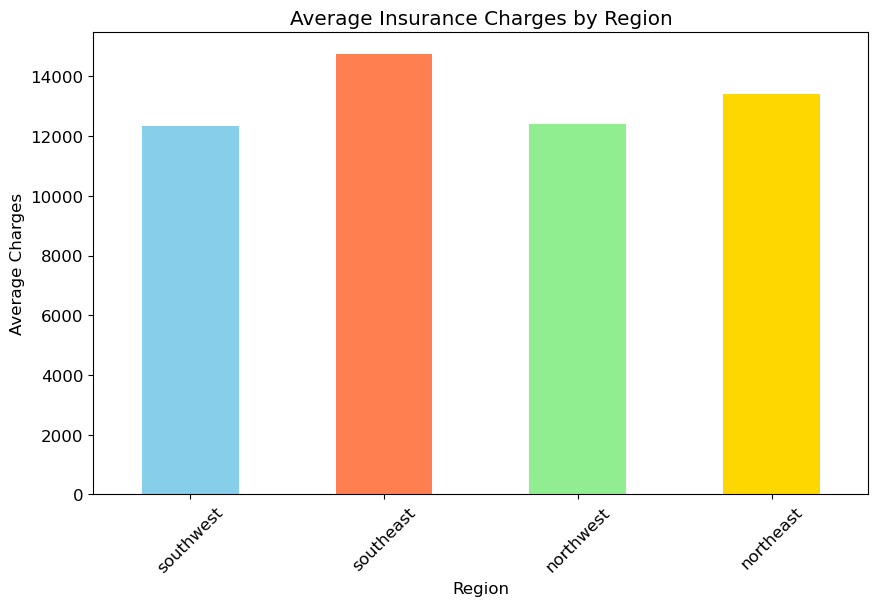

In [16]:
# Preparing data for comparison between smokers and non-smokers on insurance charges
smoker_charges = insurance_data[insurance_data['smoker'] == 'yes']['charges']
non_smoker_charges = insurance_data[insurance_data['smoker'] == 'no']['charges']

# Comparing insurance charges between smokers and non-smokers using box plots
plt.figure(figsize=(10, 6))
plt.boxplot([non_smoker_charges, smoker_charges], labels=['Non-Smokers', 'Smokers'])
plt.title('Comparison of Insurance Charges Between Smokers and Non-Smokers')
plt.ylabel('Charges')
plt.xlabel('Smoking Status')
plt.show()

# Calculating average charges by region for distinct color representation
regions = insurance_data['region'].unique()
average_charges_by_region = insurance_data.groupby('region')['charges'].mean().reindex(regions)

# Assigning distinct colors for each region
colors = ['skyblue', 'coral', 'lightgreen', 'gold']

# Creating the bar chart
average_charges_by_region.plot(kind='bar', color=colors, figsize=(10, 6))
plt.title('Average Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.xticks(rotation=45)
plt.show()


##### Comparison of Insurance Charges Between Smokers and Non-Smokers:

* The box plots clearly show a significant difference in insurance charges between smokers and non-smokers. Smokers tend to incur much higher charges compared to non-smokers, highlighting the substantial impact of smoking status on insurance costs.

##### Average Insurance Charges by Region:

* The bar chart of average insurance charges by region reveals some variation in charges across different regions, although the differences are not as stark as those observed between smokers and non-smokers. There seems to be some regional influence on insurance charges, but it is less pronounced compared to the effect of smoking status.

#### Average Insurance Charges By Age

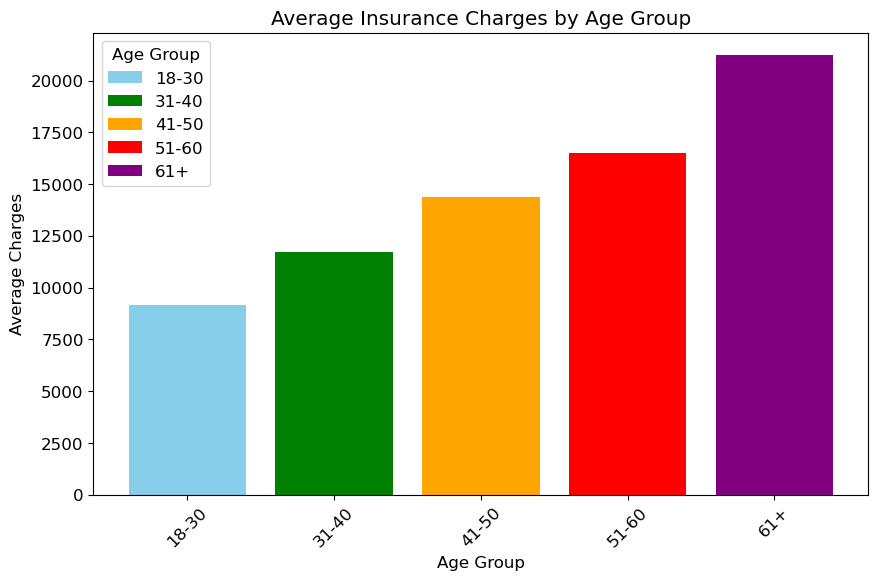

In [18]:
# Defining age groups and calculating average charges by age group

bins = [18, 30, 40, 50, 60, 100]
labels = ['18-30', '31-40', '41-50', '51-60', '61+']
insurance_data['age_group'] = pd.cut(insurance_data['age'], bins=bins, labels=labels, right=False)

average_charges_by_age_group = insurance_data.groupby('age_group')['charges'].mean()

colors = ['skyblue', 'green', 'orange', 'red', 'purple']


# Creating the bar chart with each age group in a different color
plt.figure(figsize=(10, 6))

# Plotting each age group separately to assign different colors
for (i, (age_group, charges)) in enumerate(average_charges_by_age_group.items()):
    plt.bar(age_group, charges, color=colors[i], label=age_group)

plt.title('Average Insurance Charges by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.legend(title='Age Group')
plt.xticks(rotation=45)
plt.show()


The chart is likely to show a progressive increase in insurance charges as age increases. This pattern reflects the general trend that older individuals face higher healthcare costs.

#### Average Insurance Charges by BMI

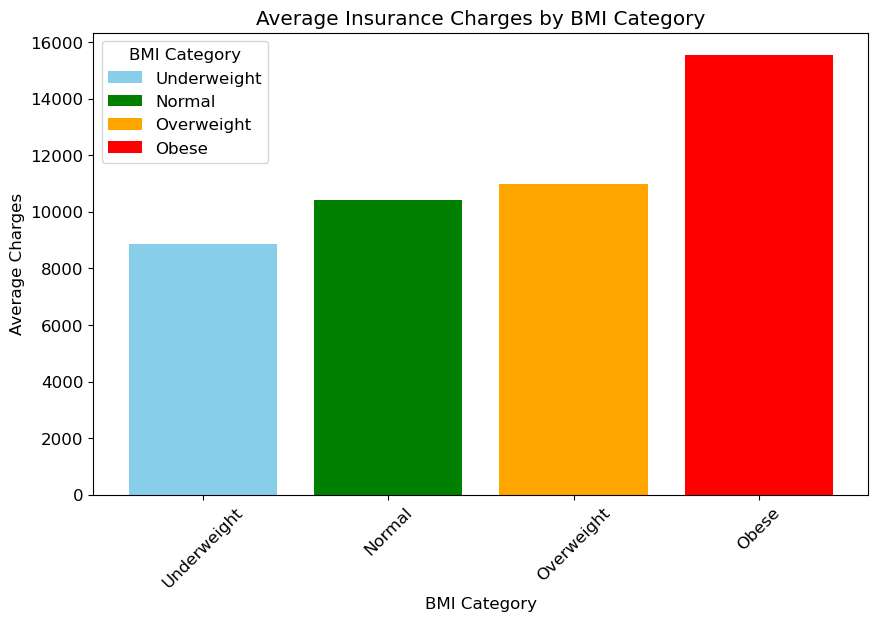

In [19]:
# Attempting BMI Category Analysis again with distinct colors for each category

bins = [0, 18.5, 25, 30, 100]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
insurance_data['bmi_category'] = pd.cut(insurance_data['bmi'], bins=bins, labels=labels, right=False)

average_charges_by_bmi_category = insurance_data.groupby('bmi_category')['charges'].mean()

# Colors for each BMI category
colors = ['skyblue', 'green', 'orange', 'red']

# Creating the bar chart with each BMI category in a different color
plt.figure(figsize=(10, 6))

# Plotting each BMI category separately to assign different colors
for (i, (bmi_category, charges)) in enumerate(average_charges_by_bmi_category.items()):
    plt.bar(bmi_category, charges, color=colors[i], label=bmi_category)

plt.title('Average Insurance Charges by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Average Charges')
plt.legend(title='BMI Category')
plt.xticks(rotation=45)
plt.show()


Individuals classified as Obese have significantly higher average insurance charges compared to those in lower BMI categories. This reflects the increased health risks and potential medical costs associated with higher BMI levels.

### 5. Interaction Effects

Exploring potential interactions between variables could provide interesting results. Common interactions might be: Age/Smoking Status, BMI/Smoking Status and Age/BMI. 


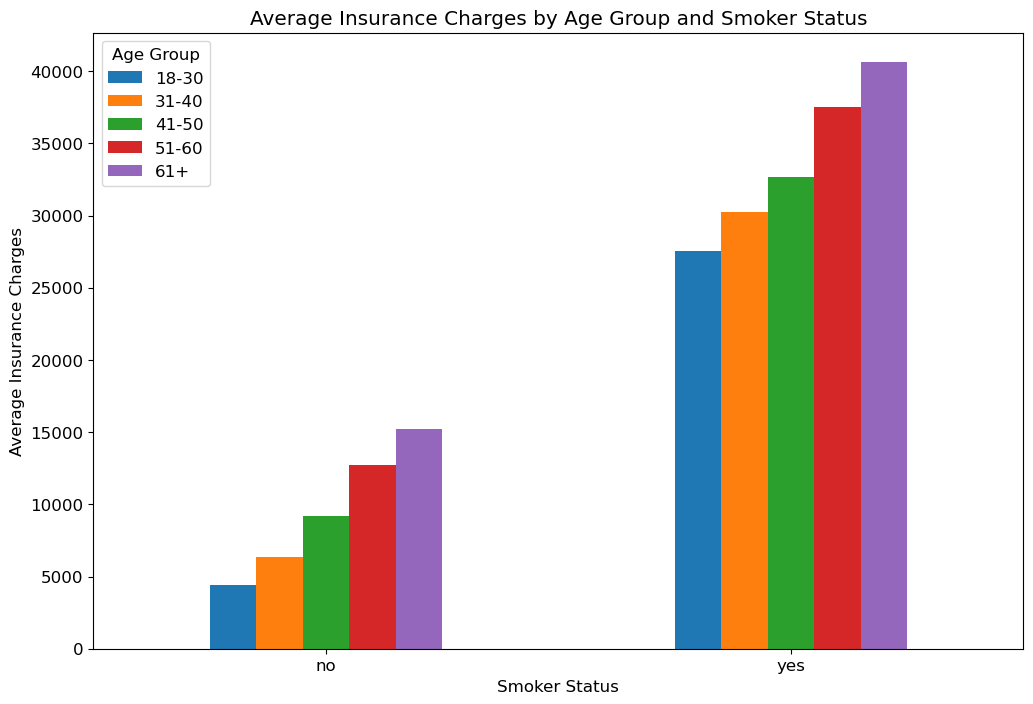

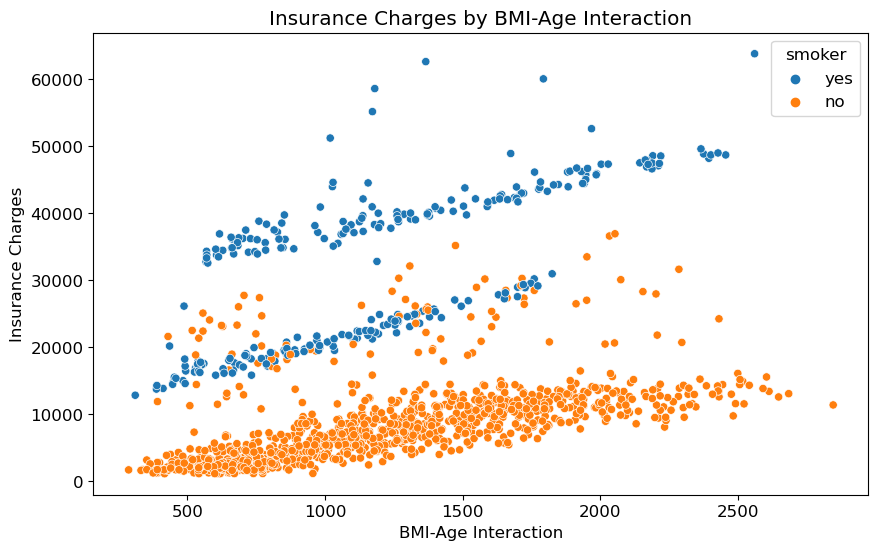

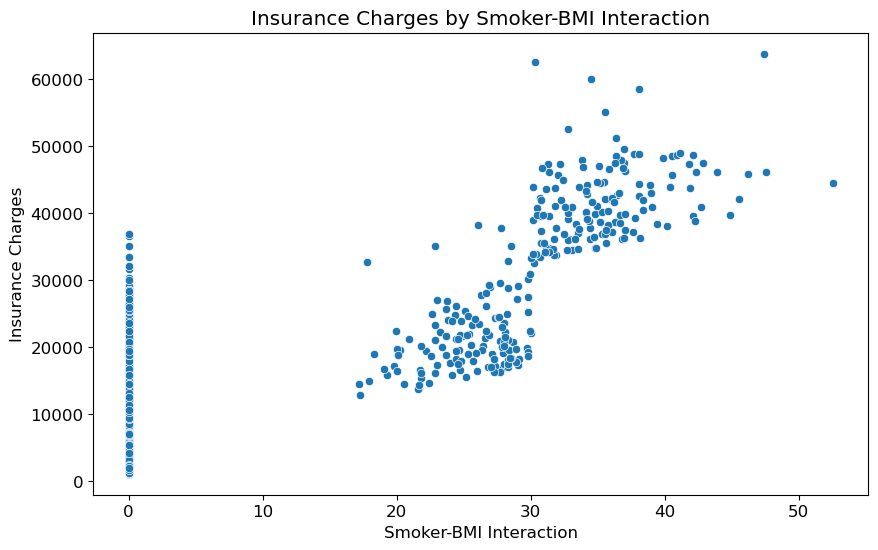

In [23]:
# Convert 'smoker' from 'yes'/'no' to 1/0
insurance_data['smoker_numeric'] = insurance_data['smoker'].map({'yes': 1, 'no': 0})

# Create interaction terms
insurance_data['age_smoker_interaction'] = insurance_data['age'] * insurance_data['smoker_numeric']
insurance_data['bmi_smoker_interaction'] = insurance_data['bmi'] * insurance_data['smoker_numeric']
insurance_data['bmi_age_interaction'] = insurance_data['bmi'] * insurance_data['age']
insurance_data['smoker_bmi_interaction'] = insurance_data['smoker_numeric'] * insurance_data['bmi']



# Group by smoker status and age group, then calculate average charges
average_charges_interaction = insurance_data.groupby(['smoker', 'age_group'])['charges'].mean().unstack()

# Visualize the interaction effect of age and smoking status on charges
average_charges_interaction.plot(kind='bar', figsize=(12, 8))
plt.title('Average Insurance Charges by Age Group and Smoker Status')
plt.xlabel('Smoker Status')
plt.ylabel('Average Insurance Charges')
plt.xticks(rotation=0)
plt.legend(title='Age Group')
plt.show()
                                                                                  
# Visualization for BMI/Age interaction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi_age_interaction', y='charges', data=insurance_data, hue='smoker')
plt.title('Insurance Charges by BMI-Age Interaction')
plt.xlabel('BMI-Age Interaction')
plt.ylabel('Insurance Charges')
plt.show()

# Visualization for Smoking/BMI interaction
plt.figure(figsize=(10, 6))
sns.scatterplot(x='smoker_bmi_interaction', y='charges', data=insurance_data)
plt.title('Insurance Charges by Smoker-BMI Interaction')
plt.xlabel('Smoker-BMI Interaction')
plt.ylabel('Insurance Charges')
plt.show()



## Summary & Key Findings

### Descriptive Statistics and Distributions

* The dataset was well-balanced across genders, with a notable higher proportion of non-smokers to smokers.
* Insurance charges showed a wide range of values, indicating significant variability in healthcare costs among individuals.

### Correlation Analysis

* Age and BMI were found to have a positive correlation with insurance charges, suggesting that older individuals and those with higher BMI tend to incur higher healthcare costs.
* Smoker status emerged as a strong predictor of insurance charges, with smokers facing substantially higher costs than non-smokers.

### Interaction Effects
* Interaction analysis revealed that the impact of smoking on insurance charges is more pronounced with increasing age and BMI, highlighting the compounded risk factors contributing to healthcare costs.

### Regional Patterns
* Although the analysis indicated some variation in average insurance charges across regions, these differences were not as pronounced as those observed for other variables such as smoker status.

### Implications
* The findings underscore the significant impact of lifestyle factors, particularly smoking, on healthcare costs. Age and BMI also contribute to the variability in insurance charges, indicating the importance of considering a wide range of demographic and health-related factors in insurance premium calculations.

## Recommendations


* For Individuals: Engaging in healthier lifestyle choices, such as quitting smoking and maintaining a healthy BMI, could lead to lower insurance costs.

* For Policymakers and Insurance Companies: Developing targeted interventions and incentive programs that encourage healthy behaviors may reduce overall healthcare costs and enable more affordable insurance premiums.

### Limitations and Future Work

* The analysis did not account for interactions between all variables, and certain regions and demographic groups may require more detailed examination.

* Future studies could incorporate additional data on medical history, income levels, and access to healthcare services to further refine the understanding of factors influencing insurance charges.
